This notebook will be for the data analysis of First Turn Cast data. The goal is to move from Tableau to Python for doing data analysis.

In [1]:
## import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.expand_frame_repr', False)

In [7]:
user_data = pd.read_excel("FirstTurnCombined.xlsx")
user_data.info()
list(user_data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Columns: 164 entries, id to lose_turn
dtypes: float64(32), int64(117), object(15)
memory usage: 169.2+ KB


['id',
 'game',
 'season',
 'play_length',
 'box_length',
 'time_delta',
 'complexity',
 'rating',
 'rank',
 'live',
 'start_player',
 'winner',
 'bp_score',
 'bp_score_normal',
 'bp_score_adjusted',
 'bp_pickup',
 'bp_play_again',
 'eric_score',
 'eric_score_normal',
 'eric_score_adjusted',
 'eric_pickup',
 'eric_play_again',
 'kiwi_score',
 'kiwi_score_normal',
 'kiwi_score_adjusted',
 'kiwi_pickup',
 'kiwi_play_again',
 'kait_score',
 'kait_score_normal',
 'kait_score_adjusted',
 'kait_pickup',
 'kait_play_again',
 'paxton_score',
 'paxton_score_normal',
 'paxton_score_adjusted',
 'paxton_pickup',
 'paxton_play_again',
 'min_normal',
 'average_normal',
 'max_normal',
 'normal_spread',
 'all_played',
 'bgg_mean',
 'bgg_std_dev',
 'bgg_min',
 'bgg_max',
 'bgg_1stq',
 'bgg_3rdq',
 'bgg_median',
 'card_drafting',
 'action_points',
 'hand_management',
 'auction_bidding',
 'deck_bag_pool_building',
 'betting_bluffing',
 'dice_rolling',
 'drafting',
 'action_drafting',
 'highest_lowest_sco

In [3]:
user_data.describe(include='all')

,id,game,season,play_length,box_length,time_delta,complexity,rating,rank,live,...,program_move,semi_coop,stat_resolution,trading,turn_auction,turn_claim,turn_role,vp_as_resource,increase_unchosen_resource,lose_turn
count,132.000000,132,132.000000,127.000000,132.000000,129.000000,130.000000,129.000000,129.000000,131,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
unique,NaN,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,7 Wonders Duel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,66.500000,NaN,2.068182,70.354331,52.856061,17.093023,2.216477,7.437209,1299.658915,NaN,...,0.007576,0.007576,0.007576,0.007576,0.007576,0.007576,0.007576,0.007576,0.007576,0.007576
std,38.249183,NaN,0.793034,44.185491,30.119136,28.692454,0.637855,0.460311,2191.395704,NaN,...,0.087039,0.087039,0.087039,0.087039,0.087039,0.087039,0.087039,0.087039,0.087039,0.087039
min,1.000000,NaN,1.000000,15.000000,12.000000,-60.000000,1.000000,6.100000,1.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.750000,NaN,1.000000,40.000000,30.000000,0.000000,1.816500,7.200000,254.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.500000,NaN,2.000000,60.000000,45.000000,10.000000,2.135000,7.400000,489.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,99.250000,NaN,3.000000,90.000000,60.000000,30.000000,2.497500,7.700000,1081.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
user_data.head()

,id,game,season,play_length,box_length,time_delta,complexity,rating,rank,live,...,program_move,semi_coop,stat_resolution,trading,turn_auction,turn_claim,turn_role,vp_as_resource,increase_unchosen_resource,lose_turn
0,1,7 Wonders Duel,1,60.0,30,30.0,2.22,8.1,17.0,No,...,0,0,0,0,0,0,0,0,0,0
1,2,Altiplano,1,150.0,90,60.0,3.31,7.6,277.0,No,...,0,0,0,0,0,0,0,0,0,0
2,3,Arboretum,1,40.0,30,10.0,2.15,7.4,252.0,No,...,0,0,0,0,0,0,0,0,0,0
3,4,Biblios,1,40.0,30,10.0,1.68,7.2,324.0,No,...,0,0,0,0,0,0,0,0,0,0
4,5,Call to Adventure,1,75.0,45,30.0,2.00,7.4,1114.0,Yes,...,0,0,0,0,0,0,0,0,0,0


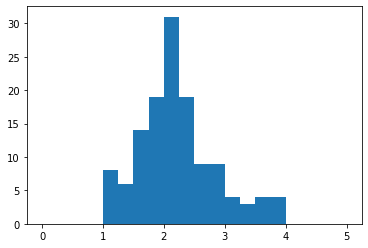

In [5]:
plt.hist(user_data['complexity'],range=(0,5),bins=20 )
plt.show()

4.576647008724498


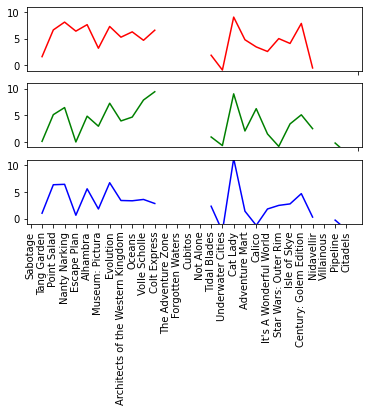

In [48]:
season_one = user_data[(user_data['season'] == 1) & (user_data['all_played'] == 'yes') & (user_data['min_normal'].notnull()) ]
season_two = user_data[(user_data['season'] == 2) & (user_data['all_played'] == 'yes')]
season_three = user_data[(user_data['season'] == 3) & (user_data['all_played'] == 'yes')]
print(np.mean(season_one['eric_score_adjusted']))
plt.figure()

plt.subplot(311)
plt.plot(season_three['game'], season_three['eric_score_adjusted'], color='red')
plt.plot(np.mean(sea))
plt.xticks('')
plt.ylim(-1,11)
plt.subplot(312)
plt.plot(season_three['game'], season_three['kiwi_score_adjusted'], color='green')
plt.xticks('')
plt.ylim(-1,11)
plt.subplot(313)
plt.plot(season_three['game'], season_three['bp_score_adjusted'], color='blue')
plt.xticks(rotation = 90)
plt.ylim(-1,11)
plt.show()